# Heart Disease Classification Model

## Problem Statement
The objective of the project is to diagnostically predict whether a patient has heart disease or not based on certain diagnostic measurements included in the dataset using logistics regression techniques.

### My approach for building a model:
1) Upload and analyze the data into jupyter notebook.
2) Perform Data Pre-processing like cleaning data, transforming data. Handling missing values, outliers and categorical veriables.
3) Spliting the available data in 80:20 ration to perform training and testing of the models.
4) Training and testing the models using Logistic Regression classification technique.
5) Evaluating model performance based on accuracy score, precision score, and recall score.
6) Steps to improve the selected model's performance.

## Important Terminologies used in this project
1) Logistic regression: is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.
2) Confusion Matrix: A confusion matrix represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class.
    TP= True Positive, FP= False Positive, FN=False Negative, TN=True Negative
3) Accuracy is calculated as the total number of two correct predictions (TP + TN) divided by the total number of a dataset (P + N). Accuracy above 80% is considered a good model.
4) Precision = TP ÷ (TP + FP). Precision score above 70 is considered good in a model.
5) Recall = TP ÷ (TP + FN). Recall score above 60 is considered good in a model.

In [14]:
# importing importent libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## About Dataset
This dataset is sourced from the online repository of UCI.
Link:https://archive.ics.uci.edu/dataset/45/heart+disease
This dataset originaly had 76 attributes, but we will be using subset of 14 attributes for the model.13 features and 1 target.
Selected features and target variables are age, sex, cholesterol level(chol), exacting, chest pain(cp), old peak, thalach, FBS, slope, thal, etc.

### Importing dataset directly from the source

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [6]:
# Looking at X dataframe
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [7]:
# More info about the dataframe
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [8]:
# Looking at Y dataframe
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [9]:
# More info about the data
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


## Observations
1) There are 10 integer data type and 3 float type in feature variable X.
2) There are missing values in 'ca' and 'thal' in feature variables X. 
3) There are no missing values target variable y
4) The num variable in y data frame integer ranges from O to 4. Need to convert it into binary value of 0 and 1 which will mean
  Value 0: No Heart Disease detected
  Value 1: Yes Heart Disease Detected

## Data Pre-processing

In [10]:
# Looking at the X dataframe closely
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [11]:
#looking for null values
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

### Observation
1) Here 'ca' variable has 4 missing values. The variable 'ca' is number of major vessels (0-3) colored by flourosopy. So we will use the most occuring value(0-3) in this variable to impute missing values.
2) Here 'thal' variable has 2 missing values. The variable 'thal' has 3 different frequent values, 3 = normal; 6 = fixed defect; 7 = reversable defect. So we will again use the most occuring value(0-3) in this variable to impute missing values

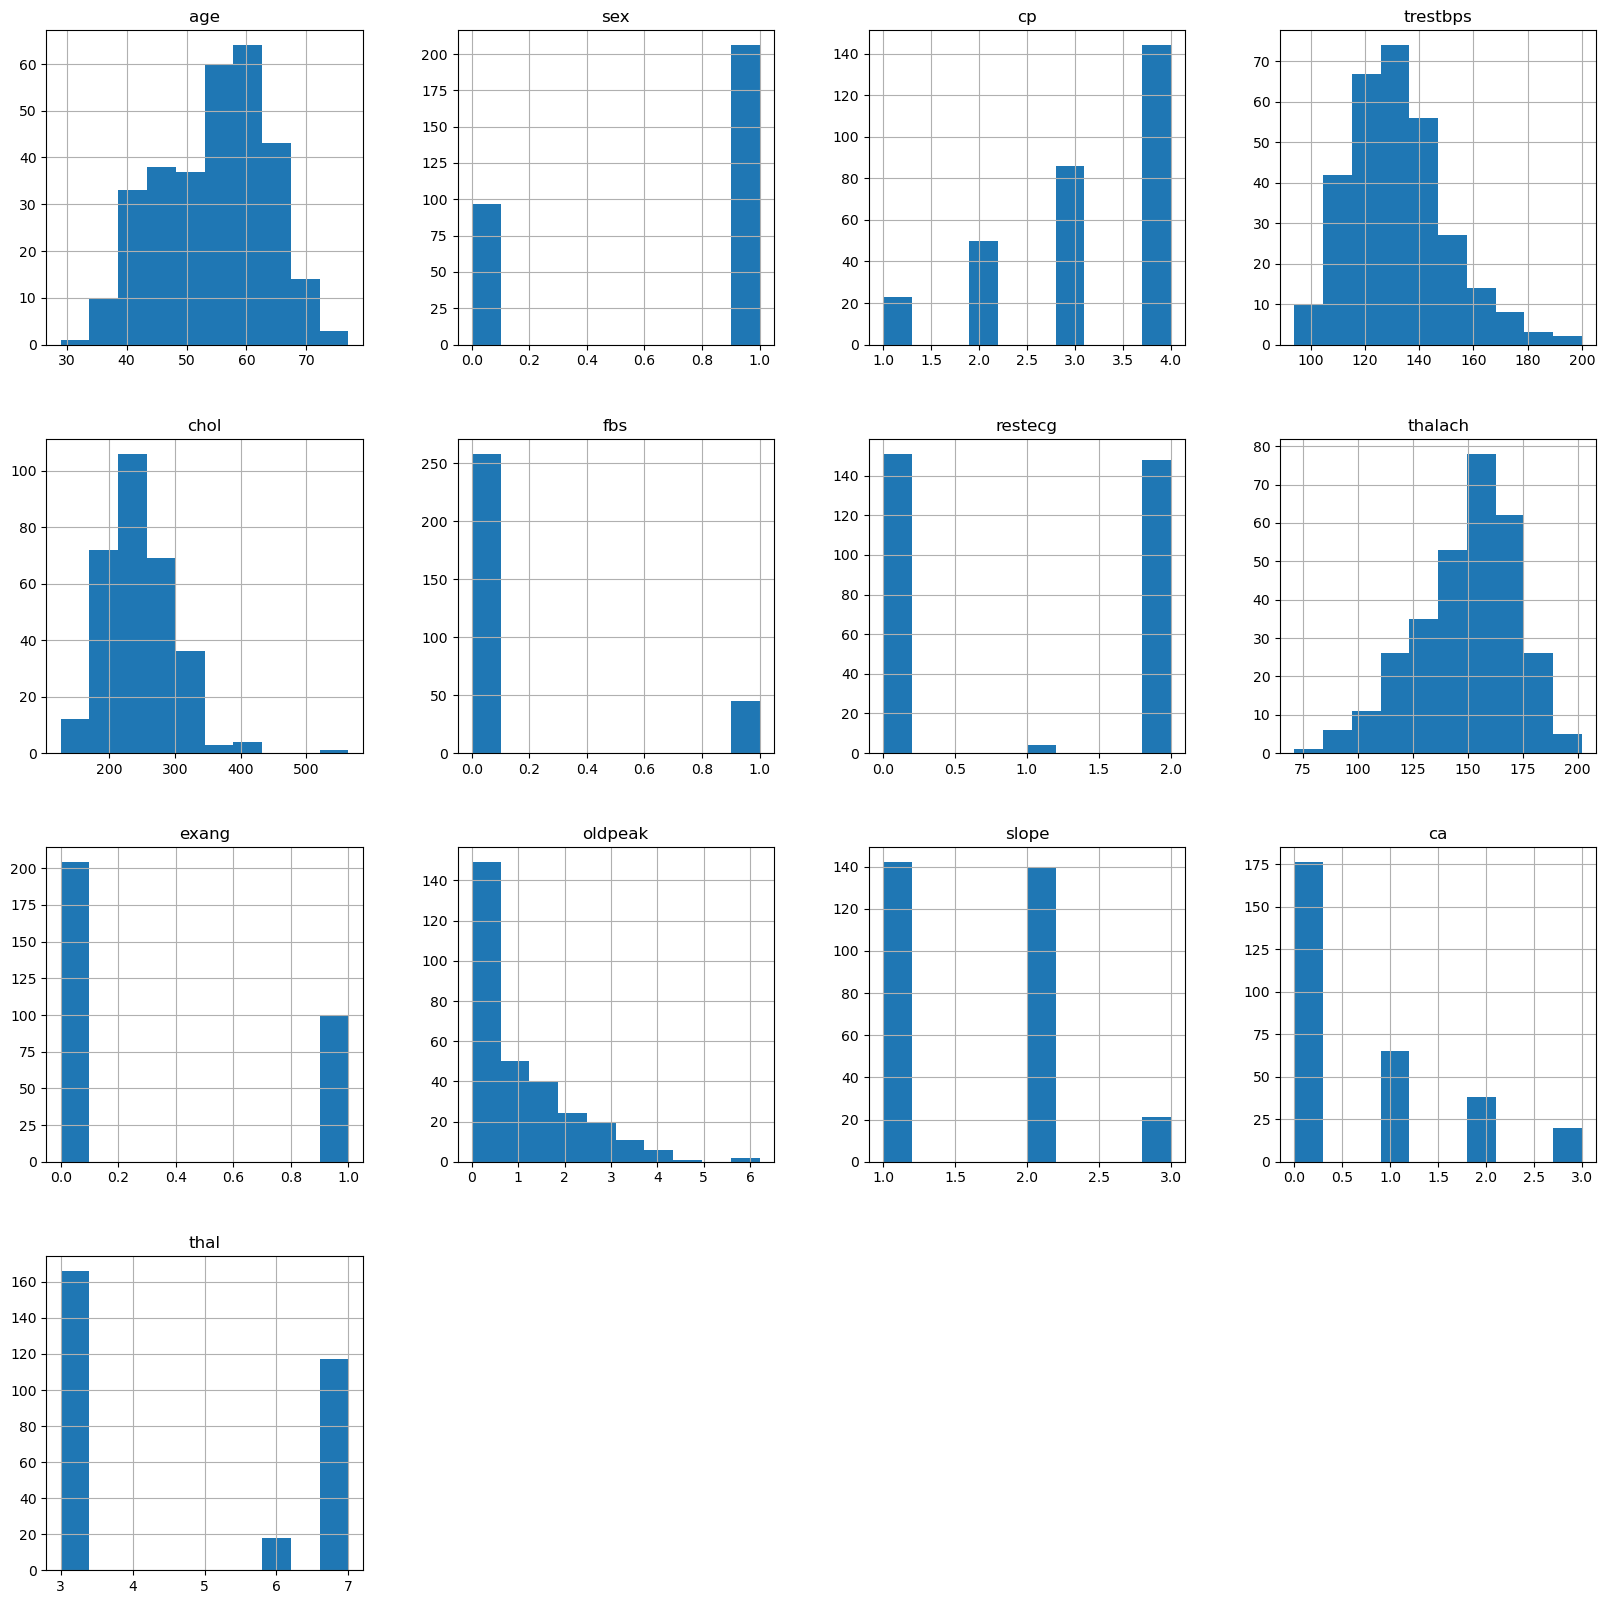

In [16]:
# plotting the histogram of each parameter to look at data distribution
X.hist(figsize = (20, 20))
plt.show()

### Imputing Missing Values
1) Using highest occuring value in 'ca' which is 0 to impute the missing value.
2) Using highest occuring value in 'thal' which is 3 to impute the missing value.

In [17]:
# Replacing the NA values with most frequent value in 'ca'
X['ca']=X['ca'].fillna(0)
# Replacing the NA values with most frequent value in 'thal'
X['thal']=X['thal'].fillna(3)

C:\Users\AKSHAY TRIPATHI\AppData\Local\Temp\ipykernel_10188\2797428716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca']=X['ca'].fillna(0)
C:\Users\AKSHAY TRIPATHI\AppData\Local\Temp\ipykernel_10188\2797428716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['thal']=X['thal'].fillna(3)


In [18]:
#Varifing imputed values
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

The missing values in the X dataframe have been imputed

In [19]:
# dropping duplicate if any
X = X.drop_duplicates()

In [20]:
X.shape

(303, 13)

No duplicate records present in the dataset

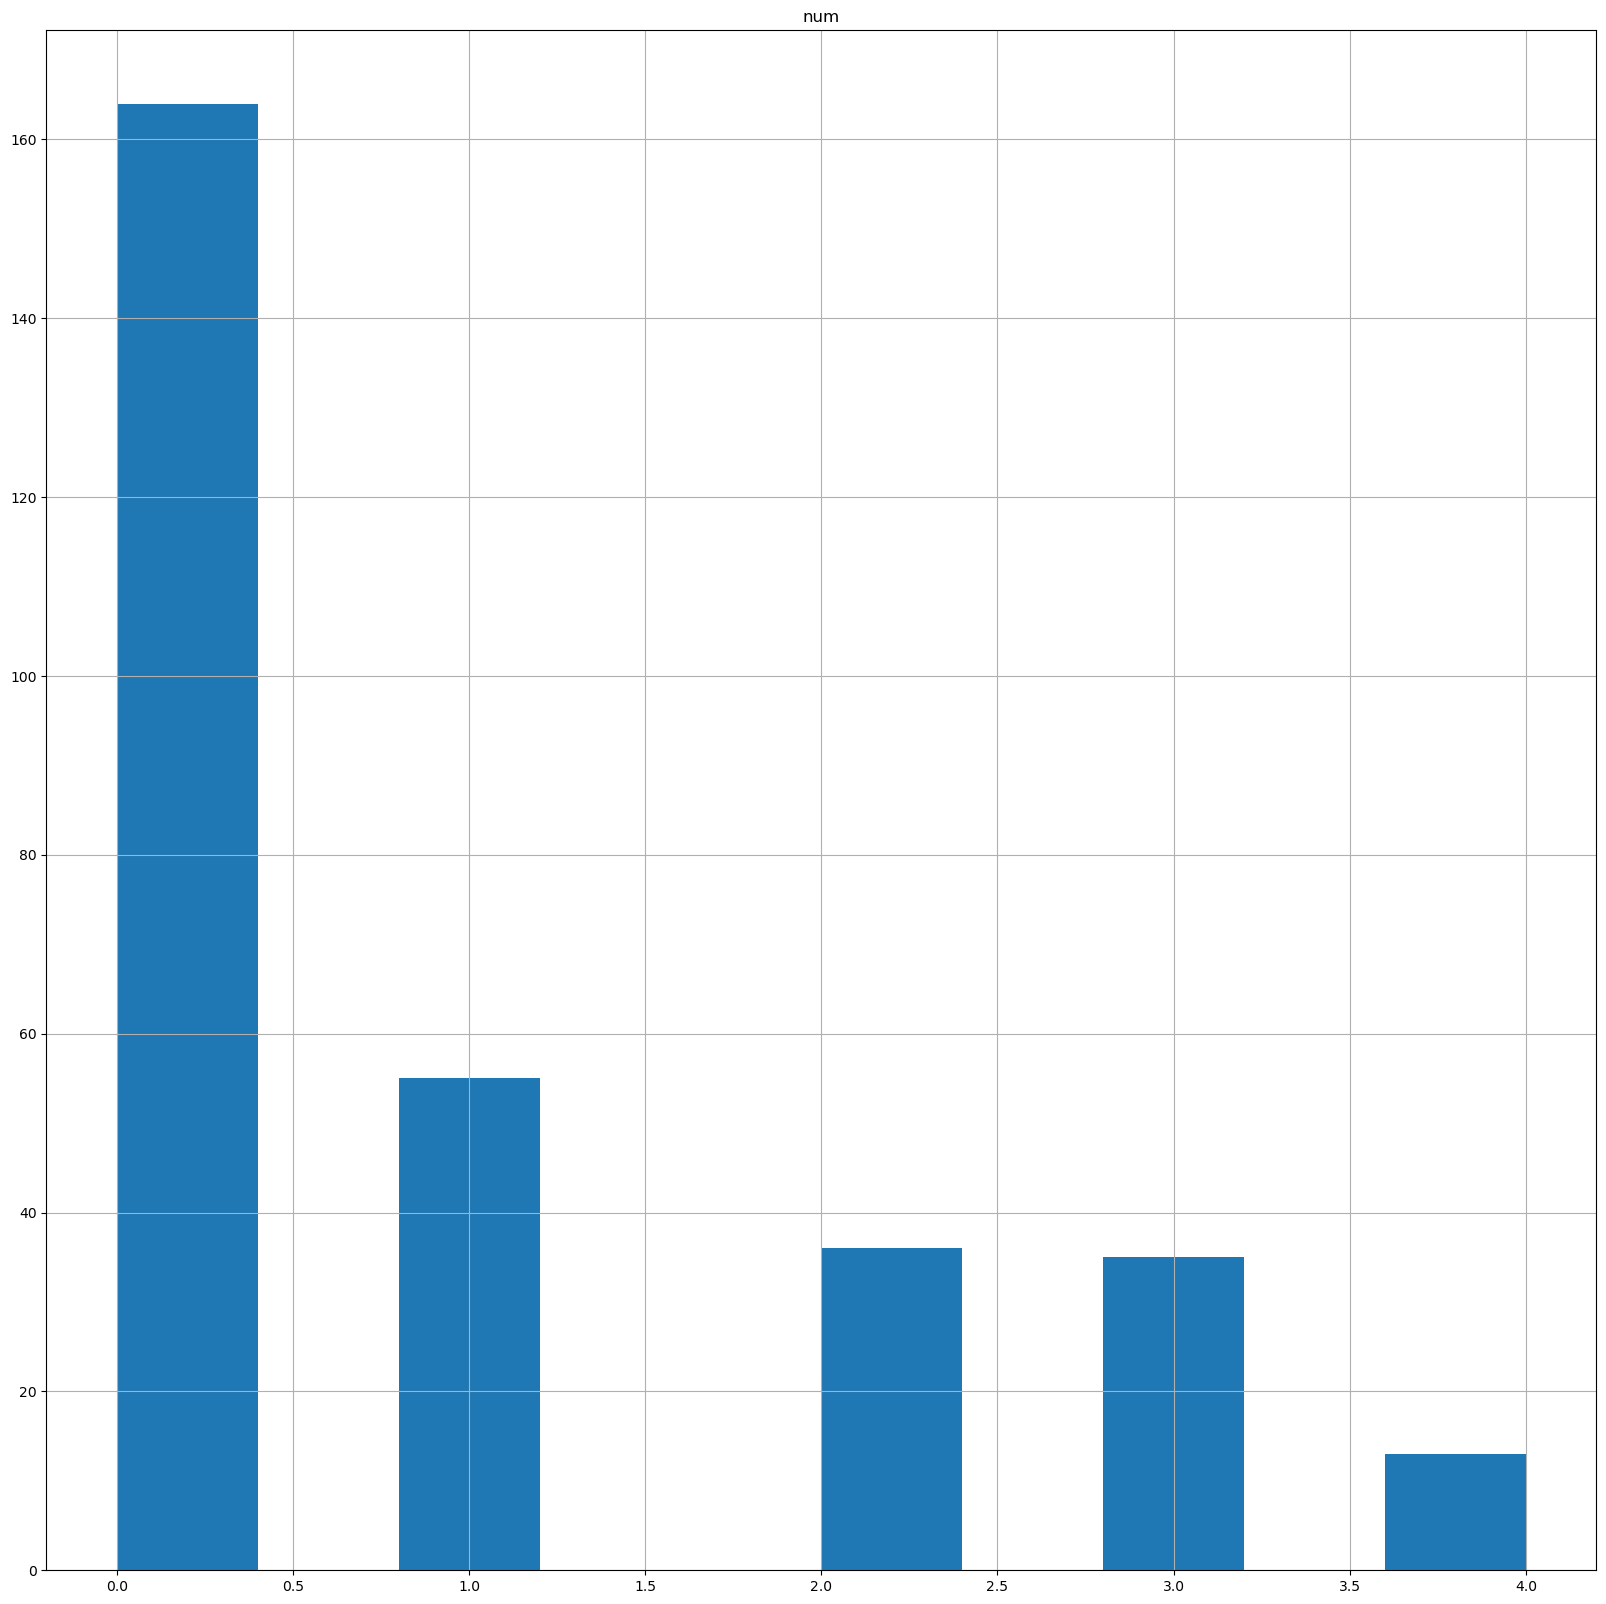

In [32]:
# plotting the histogram for target
y.hist(figsize = (20, 20))
plt.show()

#### The num variable in y data frame integer ranges from 0 to 4. Convert it into binary value of 0 and 1 using replace function which will mean
  Value 0: No Heart Disease detected(0)
  Value 1: Yes Heart Disease Detected(1,2,3,4)

In [33]:
# Using replace function
y[['num']] = y[['num']].replace({2: 1, 3: 1, 4:1})

C:\Users\AKSHAY TRIPATHI\AppData\Local\Temp\ipykernel_10188\2221952512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[['num']] = y[['num']].replace({2: 1, 3: 1, 4:1})


In [34]:
# Varifying dataframe changes
y.head(20)

,num
0,0
1,1
2,1
3,0
4,0
5,0
6,1
7,0
8,1
9,1


## Plotting a Correlation Matrix
By plotting a correlation matrix we get know how variables are correlated to each other which will further infer the important features
1) If the correlation is greater then threshold value of 0.9 then the two variables are highly positively correlated and we will remove one of them with least importance as per the target variable.
2) If the correlation is greater then threshold value of -0.9 then the two variables are highly negatively correlated and we will remove one of them with least importance as per target variable.
3) Correlational matrix including target variable we can infer how much the feature variable are related to the target variable i.e. which factor contribute most in heart disease.

In [21]:
# for those who prefer looking at numbers
X.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405


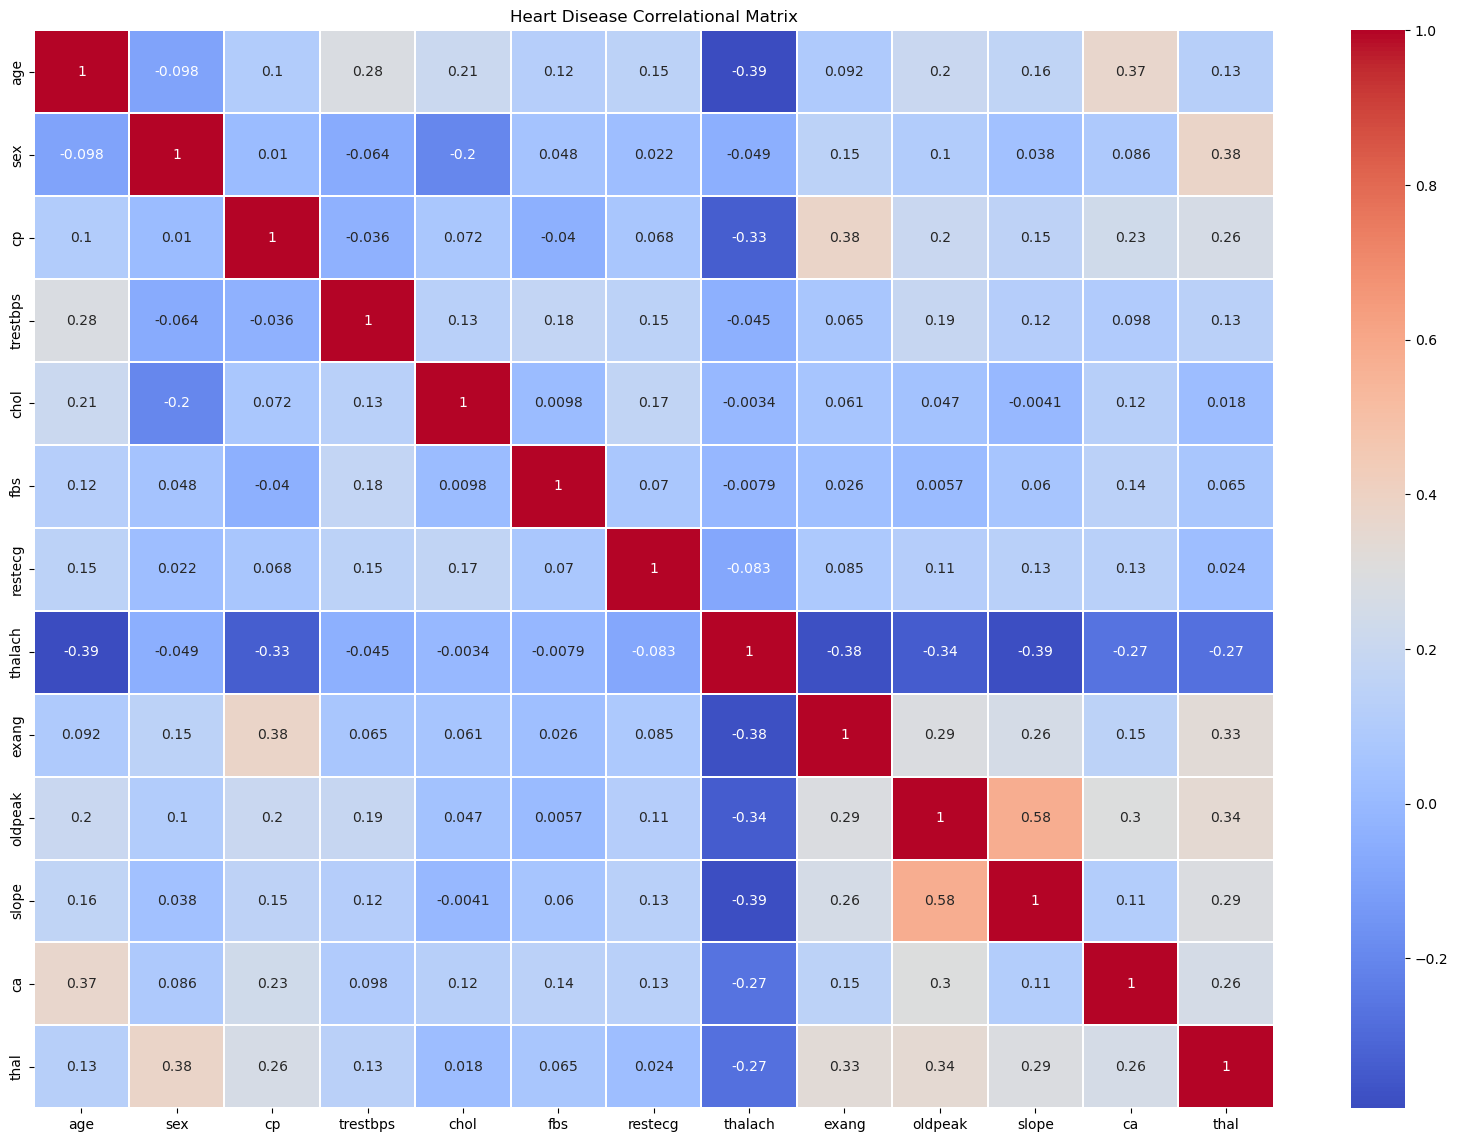

In [22]:
# for those who prefer visualizing correlation heatmap
plt.figure(figsize = (20,14))
plt.title('Heart Disease Correlational Matrix')
corr = X.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="coolwarm", annot = True)
plt.show()

### Obeservation
1) No higly correlated variables found

## Test Train Split
Splitting the data into 80:20 ratio to validate the model performance on an unseen data.Here we will use 80% of the data to train the model and 20% of unseen data to validate the performance

In [42]:
# Splitting the data in 80:20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# Analysing test and train data shape
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(242, 13) (61, 13) (242, 1) (61, 1)


## Logistic Regression

### Training the model

In [43]:
# Importing the model in use
from sklearn.linear_model import LogisticRegression
# Training the model
clf_lrs=LogisticRegression()
clf_lrs.fit(X_train,y_train)

C:\Users\AKSHAY TRIPATHI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AKSHAY TRIPATHI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting

In [44]:
# predicting 
y_pred=clf_lrs.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

### Model Performance

In [45]:
# predicting and creating confusion matrics for model K=3
confusion_matrix(y_test,clf_lrs.predict(X_test))

array([[32,  3],
       [ 9, 17]], dtype=int64)

In [57]:
# checking for accuracy
accuracy_clf_lrs=accuracy_score(y_test,clf_lrs.predict(X_test))
print('Testing Accuracy for Logistic Regression:',accuracy_clf_lrs)

Testing Accuracy for Logistic Regression: 0.8032786885245902


In [58]:
# Checking precision score
precision_clf=precision_score(y_test,clf_lrs.predict(X_test))
print('Testing Accuracy for Logistic Regression:',precision_clf)

Testing Accuracy for Logistic Regression: 0.85


In [59]:
# Checking recall score
recall_clf=recall_score(y_test,clf_lrs.predict(X_test))
print('Testing Accuracy for Logistic Regression:',recall_clf)

Testing Accuracy for Logistic Regression: 0.6538461538461539


## Conclusion

With Machine Learning we can not accuratly predict heart disease but also can know which predicter variable or patient data feature or factors are responsible for the disease to occur in order to prevent it. From this project we can use logistic regression classifier to accuratly predict heart disease with this dataset. Here if the result is 1 then the patient seems to have heart disease or if the result is 0 the patient is normal.

# Steps to improve model performance are:
1) Collecting the missing values or the nan values in the dataset from the original source as much as possible because more accurate the data better the performance of the model
2) Collecting more fresh data from the source for this dataset as with more data we will be able to train the model better and hence increase performance.
3) We can also use feature selection methode to remove some predicter variables which do not have significant impact on dependent variable.
4) We can also split the data into 75:25 ration to increase recall score.
5) Finaly we can train the model using grid search with hyper parameters to increase the model performance even further.